In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from IPython.display import Image
from six import StringIO
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

from sklearn.tree import export_graphviz
import pydotplus
import pydot

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier


In [2]:
cr = pd.read_csv("Datasets/CreditRisk.csv")

In [3]:
cr.Gender = cr.Gender.fillna("Male")
cr.Married = cr.Married.fillna("Yes")
cr.Dependents.fillna(0, inplace = True)
cr.Self_Employed.fillna("Yes", inplace = True)
cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean(), inplace= True)
cr.LoanAmount.fillna(cr.LoanAmount.mean(), inplace= True)
cr.Credit_History.fillna(0, inplace=True)

In [4]:
le = LabelEncoder()
cr[cr.select_dtypes(include = ['object']).columns] = cr[cr.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [5]:
cr = cr.iloc [:,1:13]

In [6]:
cr_train,cr_test = train_test_split(cr, test_size =.2,random_state=111)

In [7]:
cr_train_x=cr_train.iloc[:,0:-1]
cr_train_y=cr_train.iloc[:,-1]

cr_test_x=cr_test.iloc[:,0:-1]
cr_test_y=cr_test.iloc[:,-1]

In [8]:
knn = KNeighborsClassifier(n_neighbors=5)

In [9]:
knn.fit(cr_train_x, cr_train_y)

KNeighborsClassifier()

In [10]:
pred_knn = knn.predict(cr_test_x)

In [11]:
confusion_matrix_1 = confusion_matrix(pred_knn, cr_test_y)
confusion_matrix_1

array([[ 12,  24],
       [ 42, 119]])

In [24]:
prediction_1 = accuracy_score(pred_knn, cr_test_y)

In [35]:
prediction_1

0.6649746192893401

In [28]:
acc_list = {}
conf_list = {}

In [29]:
for i in range(1, 51):
    knn_1 = KNeighborsClassifier(n_neighbors=i)
    knn_1.fit(cr_train_x, cr_train_y)
    pred_knn_1 = knn_1.predict(cr_test_x)
    conf = confusion_matrix(pred_knn_1, cr_test_y)
    acc = accuracy_score(pred_knn_1, cr_test_y)
    acc_list[i]= acc
    conf_list[i] = conf

In [30]:
acc_list

{1: 0.6142131979695431,
 2: 0.5279187817258884,
 3: 0.6802030456852792,
 4: 0.6345177664974619,
 5: 0.6649746192893401,
 6: 0.6294416243654822,
 7: 0.7258883248730964,
 8: 0.6954314720812182,
 9: 0.7106598984771574,
 10: 0.7106598984771574,
 11: 0.700507614213198,
 12: 0.700507614213198,
 13: 0.6903553299492385,
 14: 0.6852791878172588,
 15: 0.7055837563451777,
 16: 0.700507614213198,
 17: 0.7106598984771574,
 18: 0.7055837563451777,
 19: 0.7055837563451777,
 20: 0.7055837563451777,
 21: 0.7106598984771574,
 22: 0.7106598984771574,
 23: 0.7208121827411168,
 24: 0.7208121827411168,
 25: 0.7157360406091371,
 26: 0.7208121827411168,
 27: 0.7157360406091371,
 28: 0.7157360406091371,
 29: 0.7157360406091371,
 30: 0.7157360406091371,
 31: 0.7157360406091371,
 32: 0.7157360406091371,
 33: 0.7208121827411168,
 34: 0.7208121827411168,
 35: 0.7208121827411168,
 36: 0.7208121827411168,
 37: 0.7258883248730964,
 38: 0.7208121827411168,
 39: 0.7258883248730964,
 40: 0.7258883248730964,
 41: 0.72588

In [31]:
conf_list

{1: array([[ 17,  39],
        [ 37, 104]]), 2: array([[27, 66],
        [27, 77]]), 3: array([[ 16,  25],
        [ 38, 118]]), 4: array([[ 20,  38],
        [ 34, 105]]), 5: array([[ 12,  24],
        [ 42, 119]]), 6: array([[ 15,  34],
        [ 39, 109]]), 7: array([[ 13,  13],
        [ 41, 130]]), 8: array([[ 16,  22],
        [ 38, 121]]), 9: array([[  7,  10],
        [ 47, 133]]), 10: array([[  9,  12],
        [ 45, 131]]), 11: array([[  2,   7],
        [ 52, 136]]), 12: array([[  7,  12],
        [ 47, 131]]), 13: array([[  2,   9],
        [ 52, 134]]), 14: array([[  3,  11],
        [ 51, 132]]), 15: array([[  3,   7],
        [ 51, 136]]), 16: array([[  3,   8],
        [ 51, 135]]), 17: array([[  3,   6],
        [ 51, 137]]), 18: array([[  3,   7],
        [ 51, 136]]), 19: array([[  2,   6],
        [ 52, 137]]), 20: array([[  2,   6],
        [ 52, 137]]), 21: array([[  2,   5],
        [ 52, 138]]), 22: array([[  3,   6],
        [ 51, 137]]), 23: array([[  2,   3],

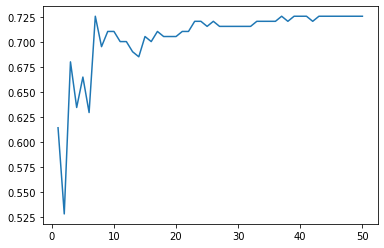

In [38]:
plt.plot(list(range(1,51)),list(acc_list.values()))

In [37]:
list(acc_list.values())

[0.6142131979695431,
 0.5279187817258884,
 0.6802030456852792,
 0.6345177664974619,
 0.6649746192893401,
 0.6294416243654822,
 0.7258883248730964,
 0.6954314720812182,
 0.7106598984771574,
 0.7106598984771574,
 0.700507614213198,
 0.700507614213198,
 0.6903553299492385,
 0.6852791878172588,
 0.7055837563451777,
 0.700507614213198,
 0.7106598984771574,
 0.7055837563451777,
 0.7055837563451777,
 0.7055837563451777,
 0.7106598984771574,
 0.7106598984771574,
 0.7208121827411168,
 0.7208121827411168,
 0.7157360406091371,
 0.7208121827411168,
 0.7157360406091371,
 0.7157360406091371,
 0.7157360406091371,
 0.7157360406091371,
 0.7157360406091371,
 0.7157360406091371,
 0.7208121827411168,
 0.7208121827411168,
 0.7208121827411168,
 0.7208121827411168,
 0.7258883248730964,
 0.7208121827411168,
 0.7258883248730964,
 0.7258883248730964,
 0.7258883248730964,
 0.7208121827411168,
 0.7258883248730964,
 0.7258883248730964,
 0.7258883248730964,
 0.7258883248730964,
 0.7258883248730964,
 0.7258883248730

In [39]:
df_inc = pd.read_csv('Datasets/adultKNN.csv')

In [65]:
df_inc.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [73]:
df_inc.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [70]:
df_inc['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [44]:
df_inc.replace('?',np.nan, regex=False, inplace=True)

In [57]:
df_inc.workclass.mode()

0    Private
dtype: object

In [72]:
df_inc['occupation'].fillna('Other-service', inplace=True)

In [123]:
df_inc['Income_'] = df_inc['income'].apply(lambda x: 0 if '<=' in x else 1)

In [124]:
df_inc_ = df_inc.drop("income", axis='columns')

In [137]:
df_inc_.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,Income_
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,3,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,3,160323,15,10,2,6,0,2,1,7688,0,40,38,1
4,18,3,103497,15,10,4,7,3,4,0,0,0,30,38,0


In [126]:
le = LabelEncoder()
df_inc_[df_inc_.select_dtypes(include = ['object']).columns] = df_inc_[df_inc_.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [127]:
inc_train, inc_test = train_test_split(df_inc_, test_size=0.2, random_state=111)

In [128]:
x_train = inc_train.drop('Income_', axis='columns')
y_train = inc_train['Income_']

x_test = inc_test.drop('Income_', axis='columns')
y_test = inc_test['Income_']

In [156]:
knn_inc_test = KNeighborsClassifier(n_neighbors=29)
knn_inc_test.fit(x_train, y_train)
pred_knn_inc_test = knn_inc_test.predict(x_test)
accuracy_score(pred_knn_inc_test, y_test)

0.7934281912171154

In [157]:
confusion_matrix(pred_knn_inc_test, y_test)

array([[7280, 1942],
       [  76,  471]])

In [130]:
acc_inc_dict = {}
conf_matrix_dict = {}

In [131]:
for i in range(1, 51):
    knn_inc = KNeighborsClassifier(n_neighbors=i)
    knn_inc.fit(x_train, y_train)
    pred_knn_inc = knn_inc.predict(x_test)
    conf = confusion_matrix(pred_knn_inc, y_test)
    acc = accuracy_score(pred_knn_inc, y_test)
    acc_inc_dict[i]=acc
    conf_matrix_dict[i] = conf


In [136]:
conf_matrix_dict

{1: array([[5999, 1294],
        [1357, 1119]]), 2: array([[6955, 1775],
        [ 401,  638]]), 3: array([[6420, 1528],
        [ 936,  885]]), 4: array([[6998, 1784],
        [ 358,  629]]), 5: array([[6733, 1636],
        [ 623,  777]]), 6: array([[7039, 1818],
        [ 317,  595]]), 7: array([[6899, 1742],
        [ 457,  671]]), 8: array([[7137, 1865],
        [ 219,  548]]), 9: array([[7025, 1796],
        [ 331,  617]]), 10: array([[7170, 1883],
        [ 186,  530]]), 11: array([[7075, 1826],
        [ 281,  587]]), 12: array([[7218, 1894],
        [ 138,  519]]), 13: array([[7162, 1849],
        [ 194,  564]]), 14: array([[7229, 1909],
        [ 127,  504]]), 15: array([[7190, 1877],
        [ 166,  536]]), 16: array([[7250, 1926],
        [ 106,  487]]), 17: array([[7217, 1900],
        [ 139,  513]]), 18: array([[7250, 1938],
        [ 106,  475]]), 19: array([[7226, 1903],
        [ 130,  510]]), 20: array([[7265, 1940],
        [  91,  473]]), 21: array([[7239, 1919],
   

In [146]:
acc_list = list(acc_inc_dict.values())
max(acc_inc_dict.values())

0.7934281912171154

In [148]:
max(acc_inc_dict, key=acc_inc_dict.get)

29

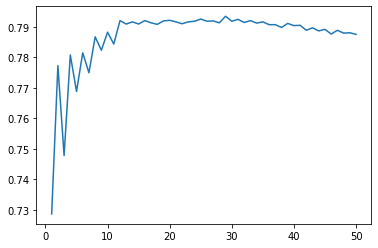

In [151]:
plt.plot(list(range(1,51)),acc_list);

In [140]:
rfc_inc = RandomForestClassifier(n_estimators=150)

In [141]:
model = rfc_inc.fit(x_train, y_train)

In [142]:
model.score(x_test, y_test)

0.8557682464940116

In [143]:
confusion_matrix(model.predict(x_test),y_test)

array([[6871,  924],
       [ 485, 1489]])

In [158]:
accuracy_score(model.predict(x_test),y_test)

0.8557682464940116

In [159]:
model.feature_importances_

array([0.15097196, 0.03623186, 0.17758772, 0.03163329, 0.0909073 ,
       0.06832119, 0.06524629, 0.10590333, 0.01361628, 0.01184171,
       0.11453743, 0.03473446, 0.08368155, 0.01478565])

In [162]:
pd.DataFrame({"Columns":x_train.columns, "Feature_Importance":model.feature_importances_}).sort_values(by='Feature_Importance', ascending=False)


,Columns,Feature_Importance
2,fnlwgt,0.177588
0,age,0.150972
10,capital-gain,0.114537
7,relationship,0.105903
4,educational-num,0.090907
12,hours-per-week,0.083682
5,marital-status,0.068321
6,occupation,0.065246
1,workclass,0.036232
11,capital-loss,0.034734


In [163]:
dt = DecisionTreeClassifier()

In [165]:
ada = AdaBoostClassifier(dt, n_estimators=20)

In [166]:
ada.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=20)

In [167]:
pred_ada = ada.predict(x_test)

In [168]:
confusion_matrix(pred_ada, y_test)

array([[6658, 1111],
       [ 698, 1302]])

In [169]:
accuracy_score(pred_ada, y_test)

0.8148223973794656

In [173]:
ada_rf = AdaBoostClassifier(rfc_inc, n_estimators=20)

In [174]:
ada_rf.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=150),
                   n_estimators=20)

In [175]:
pred_ada_rf = ada_rf.predict(x_test)

In [177]:
confusion_matrix(pred_ada_rf, y_test)

array([[6849,  952],
       [ 507, 1461]])

In [1]:
from datetime import datetime

now = datetime.now()

In [3]:
now.time()

datetime.time(14, 45, 39, 495768)